In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
df=pd.read_csv('meezan.csv')

In [3]:
df

,category,series-0- price,high,low,open,close
0,Thu Dec 06 2007,11.56,11.56,11.42,11.53,11.56
1,Fri Dec 07 2007,12.13,12.13,11.50,11.56,12.28
2,Mon Dec 10 2007,12.27,12.44,12.00,12.28,12.27
3,Tue Dec 11 2007,12.32,12.44,12.15,12.27,12.29
4,Wed Dec 12 2007,12.44,12.73,12.15,12.29,12.38
...,...,...,...,...,...,...
3361,Thu Nov 25 2021,148.00,148.95,146.50,147.00,147.75
3362,Fri Nov 26 2021,148.55,149.00,147.00,147.75,148.01
3363,Mon Nov 29 2021,150.50,158.90,147.10,148.01,151.00
3364,Tue Nov 30 2021,149.00,151.00,148.00,151.00,148.50


In [4]:
minx=df['close'].min()
maxx=df['close'].max()
print("minimum in close price is ",minx)
print("maximum in close price is ",maxx)

minimum in close price is  4.22
maximum in close price is  155.0


In [5]:

df.drop(columns='series-0- price')

,category,high,low,open,close
0,Thu Dec 06 2007,11.56,11.42,11.53,11.56
1,Fri Dec 07 2007,12.13,11.50,11.56,12.28
2,Mon Dec 10 2007,12.44,12.00,12.28,12.27
3,Tue Dec 11 2007,12.44,12.15,12.27,12.29
4,Wed Dec 12 2007,12.73,12.15,12.29,12.38
...,...,...,...,...,...
3361,Thu Nov 25 2021,148.95,146.50,147.00,147.75
3362,Fri Nov 26 2021,149.00,147.00,147.75,148.01
3363,Mon Nov 29 2021,158.90,147.10,148.01,151.00
3364,Tue Nov 30 2021,151.00,148.00,151.00,148.50


In [6]:
df.isnull().sum()

category           0
series-0- price    0
high               0
low                0
open               0
close              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         3366 non-null   object 
 1   series-0- price  3366 non-null   float64
 2   high             3366 non-null   float64
 3   low              3366 non-null   float64
 4   open             3366 non-null   float64
 5   close            3366 non-null   float64
dtypes: float64(5), object(1)
memory usage: 157.9+ KB


In [8]:
df.describe()

,series-0- price,high,low,open,close
count,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000
mean,35.947338,36.432935,35.466141,35.936215,35.977056
std,29.967181,30.429420,29.544234,29.986599,30.046902
min,4.350000,4.390000,4.220000,4.220000,4.220000
25%,11.000000,11.195000,10.765000,10.992500,10.992500
50%,26.855000,27.015000,26.560000,26.880000,26.880000
75%,51.627500,52.597500,51.190000,51.827500,51.860000
max,153.900000,158.900000,152.500000,155.000000,155.000000


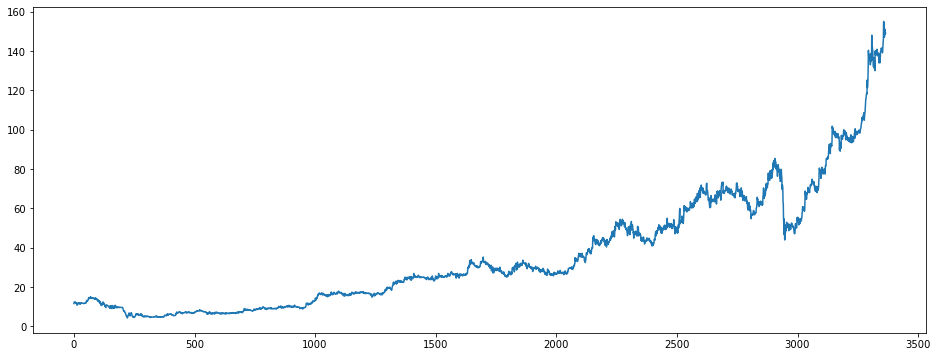

In [9]:
df.close.plot(figsize=(16,6))
plt.show()

In [10]:
x=df[['high','low','open']]
y=df['close']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
X_train.shape

(2356, 3)

In [13]:
X_test.shape

(1010, 3)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [15]:
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
print(regressor.coef_)

[ 0.72917988  0.76331961 -0.4897193 ]


In [17]:
print(regressor.intercept_)

-0.0737346360698794


In [18]:
predicted=regressor.predict(X_test)

In [19]:
print(X_test)

       high    low   open
1929  28.80  28.28  28.28
2989  47.19  46.25  47.03
202    9.55   9.55   9.55
1652  32.31  31.68  31.75
1725  31.03  30.39  31.03
...     ...    ...    ...
1982  26.88  25.92  26.72
909   10.16   9.99   9.64
2420  49.65  48.35  48.35
1499  24.70  24.32  24.70
2730  66.83  66.40  66.83

[1010 rows x 3 columns]


In [20]:
predicted.shape

(1010,)

In [21]:
df1=pd.DataFrame(y_test,predicted)

In [22]:
dfr=pd.DataFrame({"Actual price":y_test,"predictedprice":predicted})

In [23]:
print(dfr)

      Actual price  predictedprice
1929         29.44       28.664063
2989         47.35       46.608297
202           9.55        9.502816
1652         31.99       32.119445
1725         30.07       30.554010
...            ...             ...
1982         26.08       26.226565
909          10.15       10.239402
2420         48.61       49.358622
1499         24.64       24.404875
2730         66.83       66.613838

[1010 rows x 2 columns]


In [24]:
dfr.head(25)

,Actual price,predictedprice
1929,29.44,28.664063
2989,47.35,46.608297
202,9.55,9.502816
1652,31.99,32.119445
1725,30.07,30.554010
710,8.48,8.316762
565,6.35,6.726922
1477,24.32,23.839729
485,6.92,6.775851
1977,26.24,26.193714


In [25]:
regressor.score(X_test,y_test)

0.999460655189232

In [26]:
import math
print("Mean Absolute error : ",metrics.mean_absolute_error(y_test,predicted))

Mean Absolute error :  0.44073611754082487


In [27]:
print("Mean square error : ",metrics.mean_squared_error(y_test,predicted))

Mean square error :  0.5469192967861188


In [28]:
print("Root Mean square error : ",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean square error :  0.7395399223747957


In [29]:
graph=dfr.head(20)

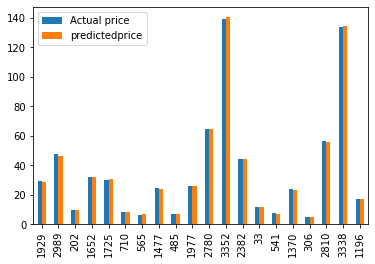

In [30]:

graph.plot(kind='bar')
plt.show()